### 利用PCA来简化数据

- 在体育比赛中，人们面对的本来是百万像素的数据，但是只有球的三维位置才最重要，这就被称为降维（dimensionality reduction）。
- 在低维下，数据更容易进行处理。另外，其相关特征可能在数据中明确地显示出来。
- 对数据进行简化的其他原因：使得数据集更易使用；降低很多算法的计算开销；去除噪声；使得结构易懂。

#### 主成分分析（Principal Component Analysis, PCA）
- 在PCA中，数据从原来的坐标系转换到了新的坐标系，新坐标系的选择由数据本身决定。第一个新坐标轴选择的是原始数据中方差最大的方向；第二个新坐标轴的选择和第一个坐标轴正交且具有最大方差的方向。该过程一直重复，重复次数为原始数据中的特征的数目。我们会发现，大部分方差都包含在最前面的几个新坐标轴中，因此我们可以忽略余下的坐标轴，从而实现降维。
- 优点：降低数据的复杂性，识别最重要的多个特征。
- 缺点：不一定需要，且可能损失有用信息。

#### 将数据转换成前N个主成分的伪代码：
- 去除平均值
- 计算协方差矩阵
- 计算协方差矩阵的特征值和特征向量
- 将特征值从大到小排序
- 保留最上面的N个特征向量
- 将数据转换到上述N个特征向量构建的新空间中

In [3]:
import numpy as np

def loadDataSet(fileName, delim='\t'):
    '''
    加载数据
    '''
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float,line)) for line in stringArr]
    return mat(datArr)

def pca(dataMat, topNfeat=9999999):
    '''
    
    topNfeat:可选参数，即应用的N个特征
    '''
    meanVals = dataMat.mean(0)
    meanRemoved = dataMat - meanVals     #减去原始数据集的平均值
    covMat = cov(meanRemoved, rowvar=0)   #计算协方差矩阵
    eigVals,eigVects = linalg.eig(mat(covMat))    #计算特征值
    eigValInd = argsort(eigVals)            #对特征值从小到大排序
    eigValInd = eigValInd[:-(topNfeat+1):-1]  #根据特征值排序结构的逆序就可以得到topNfeat个最大特征向量
    redEigVects = eigVects[:,eigValInd]       #根据排序选好的特征值找特征向量
    lowDDataMat = meanRemoved * redEigVects    #用N个特征将原始数据转换到新空间  
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat   #返回原始数据和降维之后的数据集

In [5]:
dataMat = loadDataSet('data/testSet.txt')

In [12]:
lowDMat, reconMat = pca(dataMat,1)

In [7]:
shape(lowDMat)

(1000, 1)

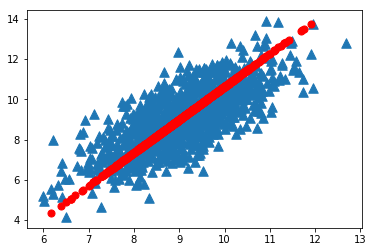

In [13]:
# 原始数据集三角点表示，第一主成分圆形点表示
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
plt.show()

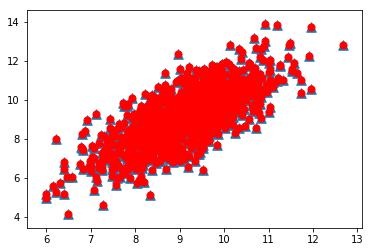

In [10]:
#没有剔除任何特征，那么重构之后的数据会和原始的特征重合。
lowDMat, reconMat = pca(dataMat, 2)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
plt.show()

#### 利用PCA对半导体制造数据降维

In [17]:
def replaceNanWithMean(): 
    '''
    将NaN替换成平均值的函数
    '''
    datMat = loadDataSet('data/secom.data', ' ')
    numFeat = shape(datMat)[1]   #计算特征数目dataMat = replaceNanWithMean()
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0],i]) #values that are not NaN (a number)
        datMat[nonzero(isnan(datMat[:,i].A))[0],i] = meanVal  #set NaN values to mean
    return datMat

In [18]:
dataMat = replaceNanWithMean()

In [19]:
meanVals = mean(dataMat, axis = 0)

In [20]:
meanRemoved = dataMat - meanVals

In [23]:
covMat = cov(meanRemoved, rowvar=0)

In [24]:
eigVals,eigVects = linalg.eig(mat(covMat))

In [25]:
eigVals

array([  5.34151979e+07 +0.00000000e+00j,
         2.17466719e+07 +0.00000000e+00j,
         8.24837662e+06 +0.00000000e+00j,
         2.07388086e+06 +0.00000000e+00j,
         1.31540439e+06 +0.00000000e+00j,
         4.67693557e+05 +0.00000000e+00j,
         2.90863555e+05 +0.00000000e+00j,
         2.83668601e+05 +0.00000000e+00j,
         2.37155830e+05 +0.00000000e+00j,
         2.08513836e+05 +0.00000000e+00j,
         1.96098849e+05 +0.00000000e+00j,
         1.86856549e+05 +0.00000000e+00j,
         1.52422354e+05 +0.00000000e+00j,
         1.13215032e+05 +0.00000000e+00j,
         1.08493848e+05 +0.00000000e+00j,
         1.02849533e+05 +0.00000000e+00j,
         1.00166164e+05 +0.00000000e+00j,
         8.33473762e+04 +0.00000000e+00j,
         8.15850591e+04 +0.00000000e+00j,
         7.76560524e+04 +0.00000000e+00j,
         6.66060410e+04 +0.00000000e+00j,
         6.52620058e+04 +0.00000000e+00j,
         5.96776503e+04 +0.00000000e+00j,
         5.16269933e+04 +0.0000000